In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/montgomery-dataset/Montgomery/ann/MCUCXR_0243_1.png.json
/kaggle/input/montgomery-dataset/Montgomery/ann/MCUCXR_0101_0.png.json
/kaggle/input/montgomery-dataset/Montgomery/ann/MCUCXR_0228_1.png.json
/kaggle/input/montgomery-dataset/Montgomery/ann/MCUCXR_0099_0.png.json
/kaggle/input/montgomery-dataset/Montgomery/ann/MCUCXR_0020_0.png.json
/kaggle/input/montgomery-dataset/Montgomery/ann/MCUCXR_0338_1.png.json
/kaggle/input/montgomery-dataset/Montgomery/ann/MCUCXR_0080_0.png.json
/kaggle/input/montgomery-dataset/Montgomery/ann/MCUCXR_0258_1.png.json
/kaggle/input/montgomery-dataset/Montgomery/ann/MCUCXR_0213_1.png.json
/kaggle/input/montgomery-dataset/Montgomery/ann/MCUCXR_0047_0.png.json
/kaggle/input/montgomery-dataset/Montgomery/ann/MCUCXR_0117_1.png.json
/kaggle/input/montgomery-dataset/Montgomery/ann/MCUCXR_0141_1.png.json
/kaggle/input/montgomery-dataset/Montgomery/ann/MCUCXR_0162_1.png.json
/kaggle/input/montgomery-dataset/Montgomery/ann/MCUCXR_0348_1.png.json
/kaggl

In [119]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sayalisalkade123/montgomery-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/montgomery-dataset


In [120]:
import cv2
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [121]:

from keras.models import *
from keras.layers import *
from keras.optimizers import Adam
from keras import backend as keras
import warnings


warnings.filterwarnings('ignore')

# # Define dice coefficient and loss functions
# def dice_coef(y_true, y_pred):
#     y_true_f = keras.flatten(y_true)
#     y_pred_f = keras.flatten(y_pred)
#     intersection = keras.sum(y_true_f * y_pred_f)
#     return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

# def dice_coef_loss(y_true, y_pred):
#     return -dice_coef(y_true, y_pred)

In [122]:
# def unet(input_size=(256, 256, 1)):
#     inputs = Input(input_size)

#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

#     conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
#     conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

#     conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
#     conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

#     conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
#     conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

#     conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
#     conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

#     up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
#     conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
#     conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

#     up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
#     conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
#     conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

#     up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
#     conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
#     conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

#     up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
#     conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
#     conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

#     conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

#     return Model(inputs=[inputs], outputs=[conv10])



In [123]:
# # Initialize model
# model = unet(input_size=(512, 512, 1))
# # model.compile(optimizer=Adam(learning_rate=1e-5), loss=dice_coef_loss,
#               metrics=[dice_coef, 'binary_accuracy'])


In [124]:
# # Resize shape
# Shape_X, Shape_Y = 512, 512

# # Helper functions
# def read_image(img_path):
#     image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#     if image is None:
#         raise ValueError(f"Could not read the image at path: {img_path}")
#     image = cv2.resize(image, (Shape_Y, Shape_X))
#     return image

# def get_preds(image):
#     prep_unet_input_img = image.reshape(1, Shape_X, Shape_Y, 1) / 255.0
#     pred_img = model.predict(prep_unet_input_img)
#     pred_img_preprocessed = (np.squeeze(pred_img) > 0.5).astype(np.uint8)
#     result = cv2.bitwise_and(image, image, mask=pred_img_preprocessed)
#     return result, pred_img_preprocessed

# def compute_metrics(y_true, y_pred):
#     y_true_flat = y_true.flatten()
#     y_pred_flat = y_pred.flatten()

#     accuracy = accuracy_score(y_true_flat, y_pred_flat)
#     precision = precision_score(y_true_flat, y_pred_flat, zero_division=1)
#     recall = recall_score(y_true_flat, y_pred_flat, zero_division=1)
#     f1 = f1_score(y_true_flat, y_pred_flat, zero_division=1)
#     iou = jaccard_score(y_true_flat, y_pred_flat, zero_division=1)

#     metrics = {
#         'accuracy': accuracy,
#         'precision': precision,
#         'recall': recall,
#         'f1_score': f1,
#         'iou': iou
#     }
#     return metrics

# def display_results(original, ground_truth, prediction):
#     plt.figure(figsize=(15, 5))

#     plt.subplot(1, 3, 1)
#     plt.title("Original Image")
#     plt.imshow(original, cmap='gray')
#     plt.axis('off')

#     plt.subplot(1, 3, 2)
#     plt.title("Ground Truth Mask")
#     plt.imshow(ground_truth, cmap='gray')
#     plt.axis('off')

#     plt.subplot(1, 3, 3)
#     plt.title("Predicted Mask")
#     plt.imshow(prediction, cmap='gray')
#     plt.axis('off')

#     plt.show()


In [125]:
!mkdir '/kaggle/working/output'

In [126]:
image_path = '/kaggle/input/montgomery-dataset/Montgomery/img/'
mask_path = '/kaggle/input/montgomery-dataset/Montgomery/mask/'
output_path = "/kaggle/working/output"

In [127]:
    # Read input image
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Input image not found: {image_path}")

    input_image = read_image(image_path)

    # Read ground truth mask
    if not os.path.exists(mask_path):
        raise FileNotFoundError(f"Ground truth mask not found: {mask_path}")

    ground_truth_mask = read_image(mask_path) / 255

NameError: name 'read_image' is not defined

In [ ]:
# # Get segmentation and mask
# segmented_output, predicted_mask = get_preds(input_image)

# # Save outputs
# #cv2.imwrite(output_path, segmented_output)
# #print(f"Segmented output saved at: {output_path}")

# # Compute metrics
# metrics = compute_metrics(ground_truth_mask.astype(np.uint8), predicted_mask)
# print("Evaluation Metrics:")
# for metric_name, metric_value in metrics.items():
#    print(f"{metric_name}: {metric_value:.4f}")

# # Display results
# display_results(input_image, ground_truth_mask, predicted_mask)


# **Working**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import Sequence

# U-Net Model Definition (build_model function)
def conv_block(input, num_filters, dropout_rate=0.3):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(dropout_rate)(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(dropout_rate)(x)

    return x

def encoder_block(input, num_filters, dropout_rate=0.3):
    x = conv_block(input, num_filters, dropout_rate)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(input, skip_features, num_filters, dropout_rate=0.3):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters, dropout_rate)
    return x

def build_model(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="U-Net")
    return model

# Loss function: Combine Binary Crossentropy and Dice Loss
def combined_loss(y_true, y_pred):
    bce = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)
    dice = 1 - (2. * tf.reduce_sum(y_true * y_pred) + 1) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + 1)
    return bce + dice

# Define the metrics
def dice_coef(y_true, y_pred):
    # Cast y_true to float32 to match the type of y_pred (float32)
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    return tf.reduce_mean(2. * tf.reduce_sum(y_true * y_pred) + 1) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + 1)

def iou_metric(y_true, y_pred):
    # Cast y_true to float32 to match the type of y_pred (float32)
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    return intersection / union


# Preprocessing functions
def preprocess_image(image_path, size=256):
    """ Preprocess the input image by loading, resizing, and normalizing it. """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (size, size))
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = image / 255.0  # Normalize
    return image

# Preprocessing functions
def preprocess_mask(mask_path, size=256):
    """ Preprocess the ground truth mask by loading, resizing, and binarizing it. """
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (size, size))
    mask = (mask > 0).astype(np.uint8)  # Binarize the mask
    mask = np.expand_dims(mask, axis=-1)  # Add channel dimension
    return mask


# Custom Data Generator for training with augmentation
class DataGenerator(Sequence):
    def __init__(self, image_paths, mask_paths, batch_size=16, size=256, shuffle=True, augment=False):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.batch_size = batch_size
        self.size = size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.image_paths))
        self.augment = augment

        # Define the ImageDataGenerator for augmentation (optional)
        if self.augment:
            self.image_datagen = ImageDataGenerator(
                rotation_range=30,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest'
            )
            self.mask_datagen = ImageDataGenerator(
                rotation_range=30,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest'
            )
        else:
            self.image_datagen = ImageDataGenerator()
            self.mask_datagen = ImageDataGenerator()

    def __len__(self):
        return int(np.floor(len(self.image_paths) / self.batch_size))
    
    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)
    
    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size: (index + 1) * self.batch_size]
        batch_images = []
        batch_masks = []
        
        for i in batch_indexes:
            image = preprocess_image(self.image_paths[i], self.size)
            mask = preprocess_mask(self.mask_paths[i], self.size)

            # Apply augmentation only if augment is True
            if self.augment:
                # Expand dimensions for ImageDataGenerator (expects 4D input)
                image = np.expand_dims(image, axis=0)  # Shape (1, size, size, 1)
                mask = np.expand_dims(mask, axis=0)  # Shape (1, size, size, 1)
                
                augmented_image = next(self.image_datagen.flow(image, batch_size=1))[0]
                augmented_mask = next(self.mask_datagen.flow(mask, batch_size=1))[0]
                
                batch_images.append(augmented_image)
                batch_masks.append(augmented_mask)
            else:
                batch_images.append(image)
                batch_masks.append(mask)
        
        return np.array(batch_images), np.array(batch_masks)

# Main program for training
def train_model(image_paths, mask_paths, valid_image_paths, valid_mask_paths, size=256):
    # Initialize the model
    model = build_model(input_shape=(size, size, 1))

    model.compile(optimizer=Adam(learning_rate=1e-4), loss=combined_loss, metrics=[dice_coef, iou_metric, "accuracy"])

    # Data Generators
    train_generator = DataGenerator(image_paths, mask_paths, batch_size=16, size=size, shuffle=True)
    valid_generator = DataGenerator(valid_image_paths, valid_mask_paths, batch_size=16, size=size, shuffle=False)

    # Callbacks
    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, min_lr=1e-7, verbose=1)

    # Train the model
    model.fit(train_generator,
              validation_data=valid_generator,
              epochs=100,
              callbacks=[early_stopping, reduce_lr])

# Main Execution Block
if __name__ == "__main__":
    # Example file paths (replace with your own)
    image_dir = '/kaggle/input/montgomery-dataset/Montgomery/img/'
    mask_dir = '/kaggle/input/montgomery-dataset/Montgomery/mask'
    
    # Get all image and mask paths
    image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(".png")])
    mask_paths = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith(".png")])

    # Split into training and validation sets (e.g., 80/20 split)
    split_index = int(0.8 * len(image_paths))
    train_image_paths = image_paths[:split_index]
    train_mask_paths = mask_paths[:split_index]
    valid_image_paths = image_paths[split_index:]
    valid_mask_paths = mask_paths[split_index:]

    # Start training
    train_model(train_image_paths, train_mask_paths, valid_image_paths, valid_mask_paths)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 32s 820ms/step - accuracy: 0.5277 - dice_coef: 0.4086 - iou_metric: 0.2571 - loss: 1.3588 - val_accuracy: 0.6035 - val_dice_coef: 0.3435 - val_iou_metric: 0.2074 - val_loss: 1.3481 - learning_rate: 1.0000e-04
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 441ms/step - accuracy: 0.6294 - dice_coef: 0.4935 - iou_metric: 0.3278 - loss: 1.1678 - val_accuracy: 0.4129 - val_dice_coef: 0.3476 - val_iou_metric: 0.2104 - val_loss: 1.3549 - learning_rate: 1.0000e-04
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 439ms/step - accuracy: 0.7023 - dice_coef: 0.5499 - iou_metric: 0.3795 - loss: 1.0594 - val_accuracy: 0.2697 - val_dice_coef: 0.3529 - val_iou_metric: 0.2142 - val_loss: 1.3686 - learning_rate: 1.0000e-04
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.7746 - dice_coef: 0.5904 - iou_metric: 0.4197 - loss: 0.9436
Epoch 4: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 443ms/step - accuracy: 0.7772 - dice_coef: 0.5928 - iou_metric: 0.4220 - loss: 0.9361 - val_accuracy: 0.2591 - val_dice_coef: 0.3640 - val_iou_metric: 0.2225 - val_loss: 1.4098 - learning_rate: 1.0000e-04
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 441ms/step - accuracy: 0.8328 - dice_coef: 0.6419 - iou_metric: 0.4727 - loss: 0.7614 - val_accuracy: 0.2591 - val_dice_coef: 0.3738 - val_iou_metric: 0.2299 - val_loss: 1.4550 - learning_rate: 1.0000e-05
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 445ms/step - accuracy: 0.8384 - dice_coef: 0.6431 - iou_metric: 0.4742 - loss: 0.7460 - val_accuracy: 0.2591 - val_dice_coef: 0.3828 - val_iou_metric: 0.2367 - val_loss: 1.5119 - learning_rate: 1.0000e-05

## **ADVANCE**

In [149]:
import numpy as np 
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import os
from cv2 import imread, createCLAHE
import cv2
from glob import glob
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler


image_path = '/kaggle/input/montgomery-dataset/Montgomery/img/'
mask_path = '/kaggle/input/montgomery-dataset/Montgomery/mask/'



In [150]:
# Get all files that exist in both directories
all_files = set(os.listdir(image_path)) & set(os.listdir(mask_path))

# Convert to list and shuffle for random split
all_files = list(all_files)
np.random.seed(42)  # for reproducibility
np.random.shuffle(all_files)

# Split into training (80%) and testing (20%) sets
split_idx = int(len(all_files) * 0.8)
training_files = all_files[:split_idx]
testing_files = all_files[split_idx:]

print("Number of total files:", len(all_files))
print("Number of training files:", len(training_files))
print("Number of testing files:", len(testing_files))

# Verify some file names
print("\nSample training files:", training_files[:3])
print("Sample testing files:", testing_files[:3])

Number of total files: 138
Number of training files: 110
Number of testing files: 28

Sample training files: ['MCUCXR_0254_1.png', 'MCUCXR_0023_0.png', 'MCUCXR_0041_0.png']
Sample testing files: ['MCUCXR_0054_0.png', 'MCUCXR_0104_1.png', 'MCUCXR_0390_1.png']


In [151]:
def Hist(image):
    H = np.zeros((256, 1))
    s = image.shape
    for i in range(s[0]):
        for j in range(s[1]):
            k = image[i, j]
            H[k, 0] = H[k, 0] + 1
    return H





def DHE(image):
    histg = Hist(image)
    s = image.shape
    x = histg.reshape(1, 256)
    y = np.array([])
    y = np.append(y, x[0, 0])

    for i in range(255):
        k = x[0, i + 1] + y[i]
        y = np.append(y, k)
    
    y = np.round((y / (s[0] * s[1])) * (256 - 1))
    for i in range(s[0]):
        for j in range(s[1]):
            k = image[i, j]
            image[i, j] = y[k]
    return image

In [152]:
# check for it 
def getData(X_shape, flag="test"):
    im_array = []
    mask_array = []
    shape = (X_shape, X_shape)
    
    files = training_files if flag == "train" else testing_files
    print(f"Processing {len(files)} files for {flag} set")
    
    for i in tqdm(files):
        try:
            # Construct proper file paths
            if flag == "test":
                img_file = os.path.join(image_path, i)
                mask_file = os.path.join(mask_path, i)
            else:  # training
                img_file = os.path.join(image_path, i)
                mask_file = os.path.join(mask_path, i)
            
            # Verify files exist before reading
            if not os.path.exists(img_file):
                print(f"Image file not found: {img_file}")
                continue
            if not os.path.exists(mask_file):
                print(f"Mask file not found: {mask_file}")
                continue
            
            # Read and process image
            im = cv2.imread(img_file)
            if im is None:
                print(f"Failed to read image: {img_file}")
                continue
                
            im = cv2.resize(im, shape)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            im = cv2.convertScaleAbs(im, alpha=1.3, beta=-20)
            im = DHE(im)
            
            # Read and process mask
            mask = cv2.imread(mask_file)
            if mask is None:
                print(f"Failed to read mask: {mask_file}")
                continue
                
            mask = cv2.resize(mask, shape)[:, :, 0]
            
            im_array.append(im)
            mask_array.append(mask)
            
        except Exception as e:
            print(f"Error processing file {i}: {str(e)}")
            continue
    
    if not im_array:
        raise ValueError(f"No valid images loaded for {flag} set")
        
    return im_array, mask_array

# Let's first check the actual file names in both directories
print("Sample image files:", list(os.listdir(image_path))[:5])
print("\nSample mask files:", list(os.listdir(mask_path))[:5])


Sample image files: ['MCUCXR_0017_0.png', 'MCUCXR_0020_0.png', 'MCUCXR_0030_0.png', 'MCUCXR_0013_0.png', 'MCUCXR_0354_1.png']

Sample mask files: ['MCUCXR_0017_0.png', 'MCUCXR_0020_0.png', 'MCUCXR_0030_0.png', 'MCUCXR_0013_0.png', 'MCUCXR_0354_1.png']


In [198]:
from tensorflow.keras.layers import BatchNormalization, Activation, Add

In [228]:
def convolution_block(inputs, num_filters, kernel_size=(3, 3), activation=True, bn=True):
    x = Conv2D(num_filters, kernel_size, padding='same')(inputs)  # Maintains spatial dimensions
    if bn:
        x = BatchNormalization()(x)  # Optional Batch Normalization
    if activation:
        x = Activation('relu')(x)  # Optional Activation
    return x


In [229]:
def residual_block(blockInput, num_filters=32,ACTIVATION='relu'):
    x = BatchNormalization()(blockInput)
    x = Activation(ACTIVATION)(x)
    x = convolution_block(x, num_filters, (3,3) )
    x = convolution_block(x, num_filters, (3,3), activation=False, bn=False)
    x = Add()([x, blockInput])
    return x
 #residual convolutional block
def res_conv_block(x, kernelsize, filters, dropout, batchnorm=False):
    conv1 = layers.Conv2D(filters, (kernelsize, kernelsize), kernel_initializer='he_normal', padding='same')(x)
    if batchnorm is True:
        conv1 = layers.BatchNormalization(axis=3)(conv1)
    conv1 = layers.Activation('relu')(conv1)    
    conv2 = layers.Conv2D(filters, (kernelsize, kernelsize), kernel_initializer='he_normal', padding='same')(conv1)
    if batchnorm is True:
        conv2 = layers.BatchNormalization(axis=3)(conv2)
        conv2 = layers.Activation("relu")(conv2)
    if dropout > 0:
        conv2 = layers.Dropout(dropout)(conv2)
        
    #skip connection    
    shortcut = layers.Conv2D(filters, kernel_size=(1, 1), kernel_initializer='he_normal', padding='same')(x)
    if batchnorm is True:
        shortcut = layers.BatchNormalization(axis=3)(shortcut)
    shortcut = layers.Activation("relu")(shortcut)
    respath = layers.add([shortcut, conv2])       
    return respath


In [266]:
def gridattentionblock(theta_x, phi_g, in_channels, scope=None):
    with tf.name_scope(scope):
        kernal = (1, 1, 1, in_channels, in_channels)
        thetaW = weight_xavier_init(shape=kernal, n_inputs=kernal[0] * kernal[1] * kernal[2] * kernal[3],
                                    n_outputs=kernal[-1], activefunction='relu', variable_name=scope + 'thetaW')
        thetaB = bias_variable([kernal[-1]], variable_name=scope + 'thetaB')
        convtheta = conv3d(theta_x, thetaW) + thetaB

        phiW = weight_xavier_init(shape=kernal, n_inputs=kernal[0] * kernal[1] * kernal[2] * kernal[3],
                                  n_outputs=kernal[-1], activefunction='relu', variable_name=scope + 'phiW')
        phiB = bias_variable([kernal[-1]], variable_name=scope + 'phiB')
        convphi = conv3d(phi_g, phiW) + phiB

        f = resnet_Add(convtheta, convphi)
        f = tf.nn.relu(f)

        psiW = weight_xavier_init(shape=kernal, n_inputs=kernal[0] * kernal[1] * kernal[2] * kernal[3],
                                  n_outputs=kernal[-1], activefunction='relu', variable_name=scope + 'psiW')
        psiB = bias_variable([kernal[-1]], variable_name=scope + 'psiB')
        convpsi = conv3d(f, psiW) + psiB
        sofmax_psi_f = tf.nn.softmax(convpsi)
        return sofmax_psi_f


In [248]:
def conv_bn_relu_drop(x, kernal, phase, drop, image_z=None, height=None, width=None, scope=None):
    with tf.name_scope(scope):
        W = weight_xavier_init(shape=kernal, n_inputs=kernal[0] * kernal[1] * kernal[2] * kernal[3],
                               n_outputs=kernal[-1], activefunction='relu', variable_name=scope + 'conv_W')
        B = bias_variable([kernal[-1]], variable_name=scope + 'conv_B')
        conv = conv3d(x, W) + B
        conv = normalizationlayer(conv, is_train=phase, height=height, width=width, image_z=image_z, norm_type='group',
                                  G=20, scope=scope)
        conv = tf.nn.dropout(tf.nn.relu(conv), drop)
        return conv


def down_sampling(x, kernal, phase, drop, image_z=None, height=None, width=None, scope=None):
    with tf.name_scope(scope):
        W = weight_xavier_init(shape=kernal, n_inputs=kernal[0] * kernal[1] * kernal[2] * kernal[3],
                               n_outputs=kernal[-1],
                               activefunction='relu', variable_name=scope + 'W')
        B = bias_variable([kernal[-1]], variable_name=scope + 'B')
        conv = conv3d(x, W, 2) + B
        conv = normalizationlayer(conv, is_train=phase, height=height, width=width, image_z=image_z, norm_type='group',
                                  G=20, scope=scope)
        conv = tf.nn.dropout(tf.nn.relu(conv), drop)
        return conv


In [263]:
def non_local_block(x, compression=2, scope=None):
    """
    non_local_block form Non_local Neural NetWorks paper,hekaiming
    :param x:input image
    :param compression:channel reduce rato
    :param scope:name scope
    :return:
    """
    with tf.name_scope(scope):
        _, Z, H, W, C = x.get_shape().as_list()
        # step1
        kernal1 = (1, 1, 1, C, C // compression)
        thetaW = weight_xavier_init(shape=kernal1, n_inputs=kernal1[0] * kernal1[1] * kernal1[2] * kernal1[3],
                                    n_outputs=kernal1[-1], activefunction='relu', variable_name=scope + 'thetaW')
        thetaB = bias_variable([kernal1[-1]], variable_name=scope + 'thetaB')
        theta = conv3d(x, thetaW) + thetaB
        theta = tf.reshape(theta, [-1, Z * H * W, C // compression])

        phiW = weight_xavier_init(shape=kernal1, n_inputs=kernal1[0] * kernal1[1] * kernal1[2] * kernal1[3],
                                  n_outputs=kernal1[-1], activefunction='relu', variable_name=scope + 'phiW')
        phiB = bias_variable([kernal1[-1]], variable_name=scope + 'phiB')
        phi = conv3d(x, phiW) + phiB
        phi = tf.reshape(phi, [-1, Z * H * W, C // compression])
        phi = tf.transpose(phi, [0, 2, 1])
        # step2
        energy = tf.matmul(theta, phi)
        energy = tf.nn.softmax(energy)
        # step3
        gW = weight_xavier_init(shape=kernal1, n_inputs=kernal1[0] * kernal1[1] * kernal1[2] * kernal1[3],
                                n_outputs=kernal1[-1], activefunction='relu', variable_name=scope + 'gW')
        gB = bias_variable([kernal1[-1]], variable_name=scope + 'gB')
        g = conv3d(x, gW) + gB
        g = tf.reshape(g, [-1, Z * H * W, C // compression])
        # step4
        y = tf.matmul(energy, g)
        y = tf.reshape(y, [-1, Z, H, W, C // compression])
        kernal2 = (1, 1, 1, C // compression, C)
        yW = weight_xavier_init(shape=kernal2, n_inputs=kernal2[0] * kernal2[1] * kernal2[2] * kernal2[3],
                                n_outputs=kernal2[-1], activefunction='relu', variable_name=scope + 'yW')
        yB = bias_variable([kernal2[-1]], variable_name=scope + 'yB')
        y = conv3d(y, yW) + yB
        y = resnet_Add(x, y)
        return y

In [239]:
def proposed_non_local_block(x, compression=2, scope=None):
    with tf.name_scope(scope):
        _, Z, H, W, C = x.get_shape().as_list()
        
        # step1
        kernal1 = (1, 1, 1, C, C // compression)
        cnv1 = weight_xavier_init(shape=kernal1, n_inputs=kernal1[0] * kernal1[1] * kernal1[2] * kernal1[3],
                                  n_outputs=kernal1[-1], activefunction='relu', variable_name=scope + 'cnv1')
        cnv2 = bias_variable([kernal1[-1]], variable_name=scope + 'cnv2')
        cnv1_1 = conv3d(x, cnv1) + cnv2
        cnv1_1 = tf.reshape(cnv1_1, [-1, Z * H * W, C // compression])

        cnv3 = weight_xavier_init(shape=kernal1, n_inputs=kernal1[0] * kernal1[1] * kernal1[2] * kernal1[3], 
                                  n_outputs=kernal1[-1], activefunction='relu', variable_name=scope + 'cnv3')
        cnv4 = bias_variable([kernal1[-1]], variable_name=scope + 'cnv4')
        cnv4_1 = conv3d(x, cnv3) + cnv4
        cnv4_1 = tf.reshape(cnv4_1, [-1, Z * H * W, C // compression])

        pcnv1 = weight_xavier_init(shape=kernal1, n_inputs=kernal1[0] * kernal1[1] * kernal1[2] * kernal1[3],
                                   n_outputs=kernal1[-1], activefunction='relu', variable_name=scope + 'pcnv1')
        pcnv2 = bias_variable([kernal1[-1]], variable_name=scope + 'pcv2')
        pcnv1_1 = conv3d(x, pcnv1) + pcnv2
        pcnv1_1 = tf.reshape(pcnv1_1, [-1, Z * H * W, C // compression])
        pcnv1_1 = tf.transpose(pcnv1_1, [0, 2, 1])

        pcnv3 = weight_xavier_init(shape=kernal1, n_inputs=kernal1[0] * kernal1[1] * kernal1[2] * kernal1[3],
                                   n_outputs=kernal1[-1], activefunction='relu', variable_name=scope + 'pcnv3')
        pcnv4 = bias_variable([kernal1[-1]], variable_name=scope + 'pcv4')
        pcnv4_1 = conv3d(x, pcnv3) + pcnv4
        pcnv4_1 = tf.reshape(pcnv4_1, [-1, Z * H * W, C // compression])
        pcnv4_1 = tf.transpose(pcnv4_1, [0, 2, 1])

        # step2
        energy1 = tf.matmul(cnv1_1, pcnv1_1)
        energy1 = tf.nn.softmax(energy1)

        energy2 = tf.matmul(cnv4_1, pcnv4_1)
        energy2 = tf.nn.softmax(energy2)
        energy = tf.matmul(energy1, energy2)

        # step3
        g1 = weight_xavier_init(shape=kernal1, n_inputs=kernal1[0] * kernal1[1] * kernal1[2] * kernal1[3],
                                n_outputs=kernal1[-1], activefunction='relu', variable_name=scope + 'g1')
        g2 = bias_variable([kernal1[-1]], variable_name=scope + 'g2')
        g1_1 = conv3d(x, g1) + g2
        g1_1 = tf.reshape(g1_1, [-1, Z * H * W, C // compression])

        g3 = weight_xavier_init(shape=kernal1, n_inputs=kernal1[0] * kernal1[1] * kernal1[2] * kernal1[3],
                                n_outputs=kernal1[-1], activefunction='relu', variable_name=scope + 'g3')
        g4 = bias_variable([kernal1[-1]], variable_name=scope + 'g4')
        g4_1 = conv3d(x, g3) + g4
        g4_1 = tf.reshape(g4_1, [-1, Z * H * W, C // compression])

        # step4
        y = tf.matmul(energy, g1_1)  # Corrected from `g` to `g1_1` (assuming this was a typo)
        y = tf.reshape(y, [-1, Z, H, W, C // compression])
        kernal2 = (1, 1, 1, C // compression, C)
        yW = weight_xavier_init(shape=kernal2, n_inputs=kernal2[0] * kernal2[1] * kernal2[2] * kernal2[3],
                                n_outputs=kernal2[-1], activefunction='relu', variable_name=scope + 'yW')
        yB = bias_variable([kernal2[-1]], variable_name=scope + 'yB')
        y = conv3d(y, yW) + yB
        y = resnet_Add(x, y)

        return y


In [241]:
def unet(input_size=(256, 256, 1)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
  
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
    
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
    
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)
    
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
   
    conv5 = non_local_block(conv5, 2, scope='nlb1')

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = gridattentionblock(conv4, up6, 128)
    conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv6)
   

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = gridattentionblock(conv3, up7, 64)
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = gridattentionblock(conv2, up8, 32)
    conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = gridattentionblock(conv1, up9, 16)
    conv9 = Conv2D(16, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])


In [243]:
def unet_resnet(input_size=(256, 256, 1)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = residual_block(conv1,32)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = residual_block(conv2,64)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = residual_block(conv3,128)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = residual_block(conv4,256)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = non_local_block(conv5, 2, scope='nlb1')

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = gridattentionblock(conv5, up6, 128)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = gridattentionblock(conv4, up7, 64)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = gridattentionblock(conv3, up8, 32)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = gridattentionblock(conv2, up9, 16)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])


In [245]:
def RNGU_NET(input_size=(256, 256, 1)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = residual_block(conv1,32)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = residual_block(conv2,64)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = residual_block(conv3,128)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = residual_block(conv4,256)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = proposed_non_local_block(conv5, 2, scope='nlb1')

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = gridattentionblock(conv5, up6, 128)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = gridattentionblock(conv4, up7, 64)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = gridattentionblock(conv3, up8, 32)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = gridattentionblock(conv2, up9, 16)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])


In [161]:
dim = 256
X_train, y_train = getData(dim, flag = "train")
X_test, y_test = getData(dim)

Processing 110 files for train set


100%|██████████| 110/110 [00:08<00:00, 13.39it/s]


Processing 28 files for test set


100%|██████████| 28/28 [00:02<00:00, 13.53it/s]


In [162]:
X_train = np.array(X_train).reshape(len(X_train), dim, dim, 1)
y_train = np.array(y_train).reshape(len(y_train), dim, dim, 1)
X_test = np.array(X_test).reshape(len(X_test), dim, dim, 1)
y_test = np.array(y_test).reshape(len(y_test), dim, dim, 1)


In [163]:
print("Image path exists:", os.path.exists(image_path))
print("Mask path exists:", os.path.exists(mask_path))
print("Number of training files:", len(training_files))
print("Number of testing files:", len(testing_files))

Image path exists: True
Mask path exists: True
Number of training files: 110
Number of testing files: 28


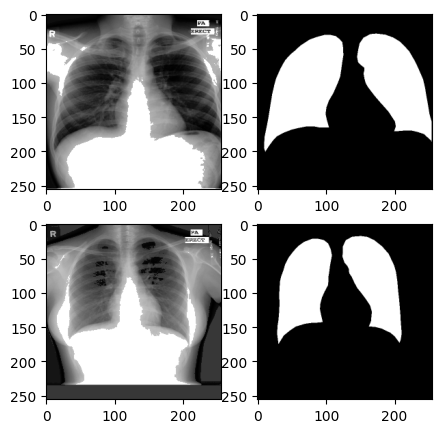

In [164]:
i = 0
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))
axs[0, 0].imshow(X_train[i], cmap='gray')
axs[0, 1].imshow(y_train[i], cmap='gray')
axs[1, 0].imshow(X_test[i], cmap='gray')
axs[1, 1].imshow(y_test[i], cmap='gray');

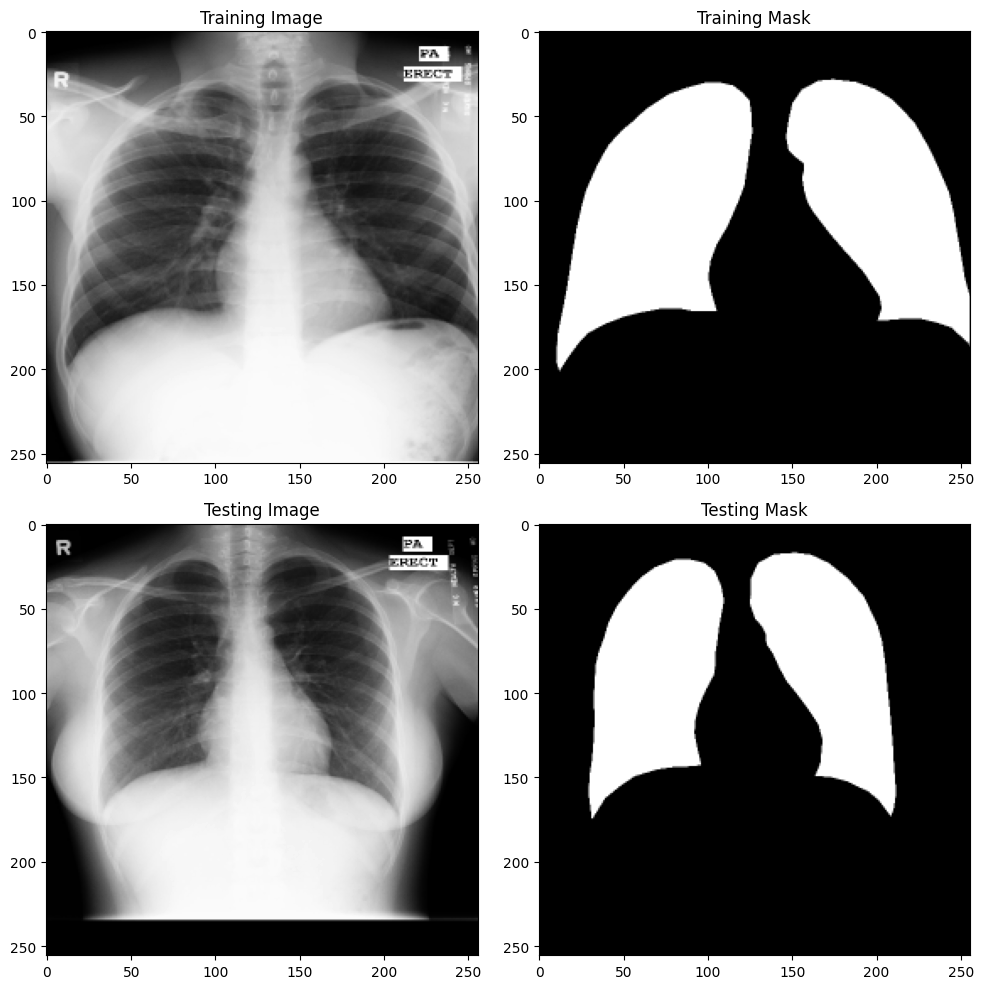


Sample training files: ['MCUCXR_0254_1.png', 'MCUCXR_0023_0.png', 'MCUCXR_0041_0.png']
Sample testing files: ['MCUCXR_0054_0.png', 'MCUCXR_0104_1.png', 'MCUCXR_0390_1.png']


In [165]:
# # Get all files from both directories
# image_files = set(os.listdir(image_path))
# mask_files = set(os.listdir(mask_path))

# # Find common files between both directories
# common_files = image_files & mask_files

# # Convert to list and shuffle for random split
# common_files = list(common_files)
# np.random.seed(42)  # for reproducibility
# np.random.shuffle(common_files)

# # Split into training (80%) and testing (20%) sets
# split_idx = int(len(common_files) * 0.8)
# training_files = common_files[:split_idx]
# testing_files = common_files[split_idx:]

# print("Total files:", len(common_files))
# print("Training files:", len(training_files))
# print("Testing files:", len(testing_files))

# Now let's try to visualize one example from each set
shape = (256, 256)

# Process one test image
for i in testing_files:     
    imtest = cv2.imread(os.path.join(image_path, i))
    if imtest is None:
        print(f"Could not read test image: {i}")
        continue
    imtest = cv2.resize(imtest, shape)[:, :, 0]
    
    masktest = cv2.imread(os.path.join(mask_path, i))
    if masktest is None:
        print(f"Could not read test mask: {i}")
        continue
    masktest = cv2.resize(masktest, shape)[:, :, 0]
    break

# Process one train image
for i in training_files: 
    imtrain = cv2.imread(os.path.join(image_path, i))
    if imtrain is None:
        print(f"Could not read train image: {i}")
        continue
    imtrain = cv2.resize(imtrain, shape)[:, :, 0]
    
    masktrain = cv2.imread(os.path.join(mask_path, i))
    if masktrain is None:
        print(f"Could not read train mask: {i}")
        continue
    masktrain = cv2.resize(masktrain, shape)[:, :, 0]
    break

# Visualize the images
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs[0, 0].imshow(imtrain, cmap='gray')
axs[0, 0].set_title('Training Image')
axs[0, 1].imshow(masktrain, cmap='gray')
axs[0, 1].set_title('Training Mask')
axs[1, 0].imshow(imtest, cmap='gray')
axs[1, 0].set_title('Testing Image')
axs[1, 1].imshow(masktest, cmap='gray')
axs[1, 1].set_title('Testing Mask')
plt.tight_layout()
plt.show()

# Print some example filenames to verify
print("\nSample training files:", training_files[:3])
print("Sample testing files:", testing_files[:3])

In [166]:
assert X_train.shape == y_train.shape
assert X_test.shape == y_test.shape
images = np.concatenate((X_train, X_test), axis=0)
masks  = np.concatenate((y_train, y_test), axis=0)

In [167]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)





metrics = [dice_coef, 'binary_accuracy', 
           tf.keras.metrics.Precision(), 
           tf.keras.metrics.Recall()]


In [182]:
model = unet(input_size=(256, 256, 1))
model.compile(optimizer=Adam(learning_rate=1e-5), loss=dice_coef_loss, metrics=metrics)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_227 (Conv2D)       │ (None, 256, 256, 16)   │            160 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_228 (Conv2D)       │ (None, 256, 256, 16)   │          2,320 │ conv2d_227[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_44          │ (None, 128, 128, 16)   │              0 │ conv2d_228[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_229 (Conv2D)       │ (None, 128, 128, 32)   │          4,640 │ max_pooling2d_44[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_230 (Conv2D)       │ (None, 128, 128, 32)   │          9,248 │ conv2d_229[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_45          │ (None, 64, 64, 32)     │              0 │ conv2d_230[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_231 (Conv2D)       │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d_45[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_232 (Conv2D)       │ (None, 64, 64, 64)     │         36,928 │ conv2d_231[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_46          │ (None, 32, 32, 64)     │              0 │ conv2d_232[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_233 (Conv2D)       │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_46[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_234 (Conv2D)       │ (None, 32, 32, 128)    │        147,584 │ conv2d_233[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_47          │ (None, 16, 16, 128)    │              0 │ conv2d_234[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_235 (Conv2D)       │ (None, 16, 16, 128)    │        147,584 │ max_pooling2d_47[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_236 (Conv2D)       │ (None, 16, 16, 128)    │        147,584 │ conv2d_235[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_238 (Conv2D)       │ (None, 16, 16, 64)     │          8,256 │ conv2d_236[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_237 (Conv2D)       │ (None, 16, 16, 64)     │          8,256 │ conv2d_236[0][0]       │
├──────────────────────

 Total params: 1,622,913 (6.19 MB)

 Trainable params: 1,622,913 (6.19 MB)

 Non-trainable params: 0 (0.00 B)

In [183]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau


In [184]:
weight_path="{}_best_weights.weights.h5".format('cxr_reg')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5, 
                                   patience=4, 
                                   verbose=1, mode='min', epsilon=0.0001, cooldown=2, min_lr=1e-6)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=35) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]



In [185]:
from IPython.display import clear_output
from keras.optimizers import Adam 
from sklearn.model_selection import train_test_split


In [186]:
X_train, X_val, Y_train, Y_val = train_test_split((images-127.0)/127.0, 
                                                  (masks>127).astype(np.float32), 
                                                  test_size = 0.1, 
                                                  random_state = 2018)

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, 
                                                    test_size = 0.1, 
                                                    random_state = 2018)




model.compile(optimizer=Adam(learning_rate=1e-3), 
              loss=[dice_coef_loss], 
              metrics = metrics)

# **Unet**

In [187]:
loss_history = model.fit(X_train, Y_train,
                         batch_size = 32, epochs = 50,
                         validation_data = (X_val, Y_val),
                         callbacks=callbacks_list)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - binary_accuracy: 0.7082 - dice_coef: 0.3389 - loss: -0.3389 - precision_2: 0.3998 - recall_2: 0.3611   
Epoch 1: val_loss improved from inf to -0.36805, saving model to cxr_reg_best_weights.weights.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - binary_accuracy: 0.7037 - dice_coef: 0.3395 - loss: -0.3395 - precision_2: 0.4024 - recall_2: 0.3961 - val_binary_accuracy: 0.6597 - val_dice_coef: 0.3681 - val_loss: -0.3681 - val_precision_2: 0.4403 - val_recall_2: 0.7989 - learning_rate: 0.0010
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - binary_accuracy: 0.6443 - dice_coef: 0.3523 - loss: -0.3517 - precision_2: 0.4024 - recall_2: 0.7842
Epoch 2: val_loss improved from -0.36805 to -0.40440, saving model to cxr_reg_best_weights.weights.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - binary_accuracy: 0.6441 - dice_coef: 0.3531 - loss: -0.3521 - precision_2: 0.4018 - recall_2: 0.7833 - val_binary_accuracy: 0.6696 - val_dice_coef: 0.4044 - val_loss: 

Epoch 48/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - binary_accuracy: 0.9818 - dice_coef: 0.9631 - loss: -0.9631 - precision_2: 0.9699 - recall_2: 0.9567

Epoch 48: val_loss did not improve from -0.96313
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - binary_accuracy: 0.9817 - dice_coef: 0.9632 - loss: -0.9632 - precision_2: 0.9693 - recall_2: 0.9574 - val_binary_accuracy: 0.9777 - val_dice_coef: 0.9589 - val_loss: -0.9589 - val_precision_2: 0.9850 - val_recall_2: 0.9343 - learning_rate: 0.0010

Epoch 49/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - binary_accuracy: 0.9803 - dice_coef: 0.9607 - loss: -0.9606 - precision_2: 0.9721 - recall_2: 0.9497
Epoch 49: val_loss did not improve from -0.96313
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - binary_accuracy: 0.9804 - dice_coef: 0.9611 - loss: -0.9608 - precision_2: 0.9708 - recall_2: 0.9516 - val_binary_accuracy: 0.9771 - val_dice_coef: 0.9577 - val_loss: -0.9577 - val_precision_2: 0.9875 - val_recall_2: 0.9298 - learning_rate: 0.0010

Epoch 50/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - binary_accuracy: 0.9810 - dice_coef: 0.9621 - loss: -0.9618 - precision_2: 0.9700 - recall_2: 0.9542
Epoch 50: val_loss did not improve from -0.96313


Epoch 50: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - binary_accuracy: 0.9809 - dice_coef: 0.9623 - loss: -0.9617 - precision_2: 0.9682 - recall_2: 0.9559 - val_binary_accuracy: 0.9752 - val_dice_coef: 0.9540 - val_loss: -0.9540 - val_precision_2: 0.9900 - val_recall_2: 0.9206 - learning_rate: 0.0010


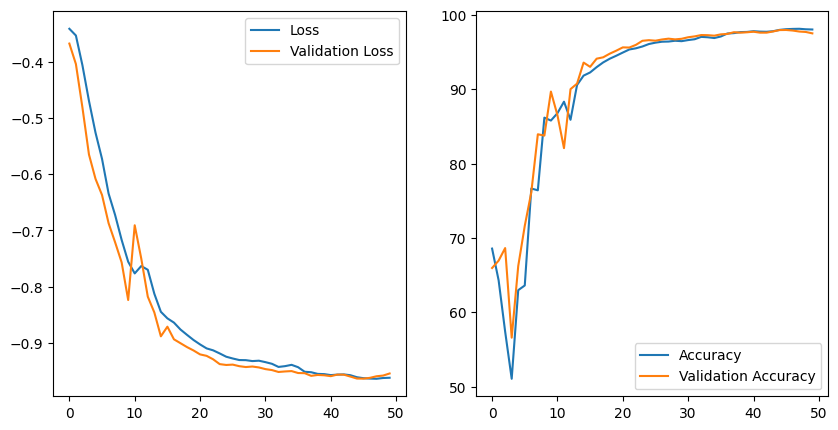

In [188]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100 * np.array(loss_history.history['binary_accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100 * np.array(loss_history.history['val_binary_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend();


In [189]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14633613869173726927
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16266690560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 992749847977792657
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
xla_global_id: 416903419
]


In [190]:
pred_candidates = np.random.randint(1, X_test.shape[0], 10)
preds = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


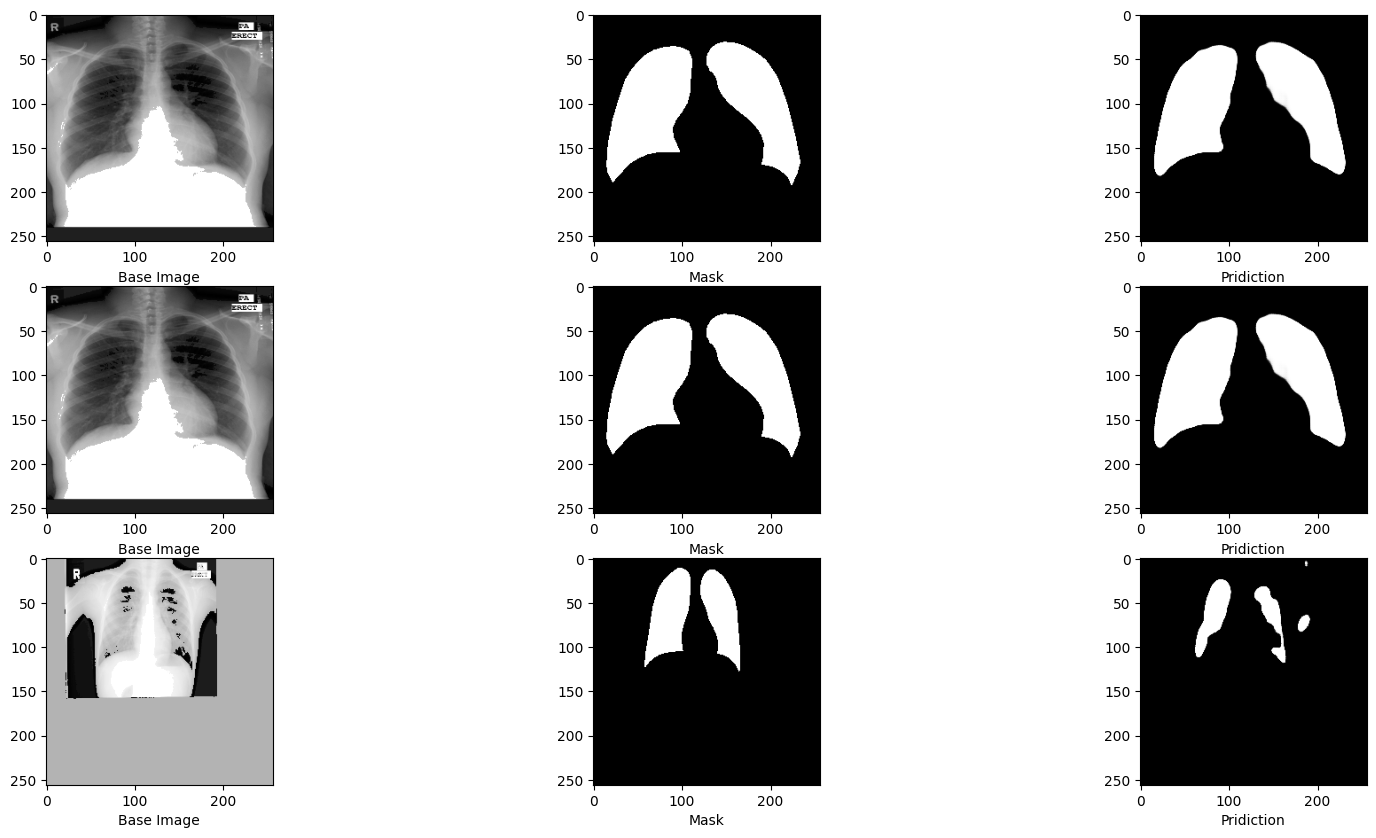

In [191]:
plt.figure(figsize=(20, 10))

for i in range(0, 9, 3):
    plt.subplot(3, 3, i + 1)
    
    plt.imshow(np.squeeze(X_test[pred_candidates[i]]), cmap='gray')
    plt.xlabel("Base Image")
    
    
    plt.subplot(3, 3, i + 2)
    plt.imshow(np.squeeze(Y_test[pred_candidates[i]]), cmap='gray')
    plt.xlabel("Mask")
    
    plt.subplot(3, 3, i + 3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]), cmap='gray')
    plt.xlabel("Pridiction")

In [192]:
model.evaluate(X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step - binary_accuracy: 0.9693 - dice_coef: 0.9323 - loss: -0.9323 - precision_2: 0.9826 - recall_2: 0.8874


[-0.9322621822357178,
 0.9322621822357178,
 0.9693228006362915,
 0.9826376438140869,
 0.8873785734176636]

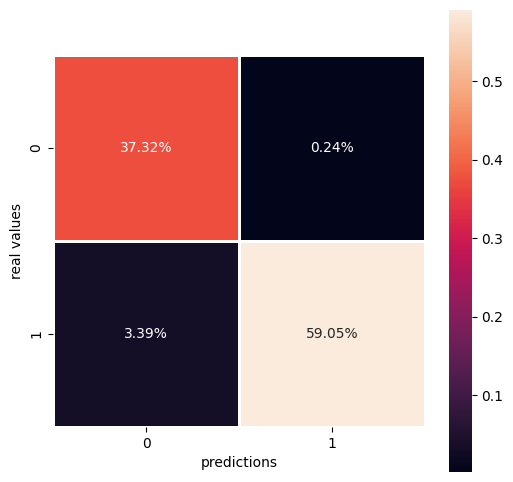

In [193]:
import seaborn as sns
FP = len(np.where(preds - Y_test  == -1)[0])
FN = len(np.where(preds - Y_test  == 1)[0])
TP = len(np.where(preds + Y_test ==2)[0])
TN = len(np.where(preds + Y_test == 0)[0])
cmat = [[TP, FN], [FP, TN]]

plt.figure(figsize = (6,6))
sns.heatmap(cmat / np.sum(cmat), annot=True, fmt = '.2%', square=1,   linewidth=2.)
plt.xlabel("predictions")
plt.ylabel("real values")
plt.show()


In [194]:
Acc = (TP + TN) / (TP + FP + FN + TN)
Recall = TP / (TP + FN)
Precision = TP / (TP + FP)
Jaccard = TP / (TP + FP + FN)
F1_Score = (2 * Precision * Recall) / (Precision + Recall)
print(f'Acc = {Acc}')
print(f'Recall = {Recall}')
print(f'Precision = {Precision}')
print(f'Jaccard = {Jaccard}')
print(f'F1_Score = {F1_Score}')

Acc = 0.9636740359920688
Recall = 0.9935340497427624
Precision = 0.9167326760484256
Jaccard = 0.9112957719736188
F1_Score = 0.953589481373265


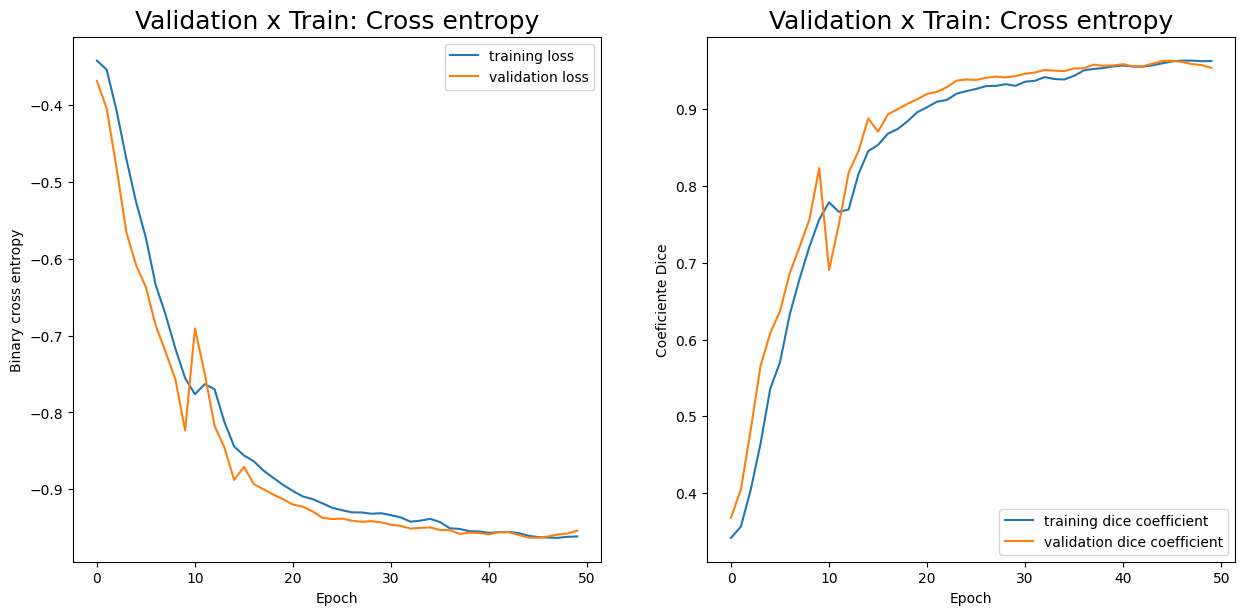

In [195]:
def dice_coef_test(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    union = np.sum(y_true_f) + np.sum(y_pred_f)
    if union==0: return 1
    intersection = np.sum(y_true_f * y_pred_f)
    return 2. * intersection / union





def get_metrics(loss_history):
    fig = plt.figure(figsize = (15,15))
    plt.subplot(2,2,1)
    plt.plot(loss_history.history["loss"], label = "training loss")
    plt.plot(loss_history.history["val_loss"], label = "validation loss")
    plt.title("Validation x Train: Cross entropy", fontsize=18, y=1)
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Binary cross entropy")

    plt.subplot(2,2,2)
    plt.plot(loss_history.history["dice_coef"], label = "training dice coefficient")
    plt.plot(loss_history.history["val_dice_coef"], label = "validation dice coefficient")
    plt.title("Validation x Train: Cross entropy", fontsize=18, y=1)
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Coeficiente Dice")
    
get_metrics(loss_history = loss_history)

# **Unet + Resnet**

In [267]:
model = unet_resnet(input_size=(256, 256, 1))
model.compile(optimizer=Adam(learning_rate=1e-5), loss=dice_coef_loss, metrics=metrics)
model.summary()

AttributeError: 'KerasTensor' object has no attribute 'get_shape'